In [19]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = {
    'Area': [500, 600, 700, 800, 900, 1000, 1100, 1200,
             1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
    'Price': [150000, 180000, 210000, 240000, 270000, 300000, 330000,
              370000, 410000, 460000, 510000, 570000, 630000,
              700000, 770000, 850000]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Area,Price
0,500,150000
1,600,180000
2,700,210000
3,800,240000
4,900,270000
5,1000,300000
6,1100,330000
7,1200,370000
8,1300,410000
9,1400,460000


In [9]:
X = df[['Area']]
y = df[['Price']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model_l = LinearRegression()

model_l.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model_l.predict(X_test)

In [12]:
poly = PolynomialFeatures(degree=4)

In [13]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
poly_l  = LinearRegression()

In [15]:
poly_l.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
y_pred_poly = poly_l.predict(X_test_poly)

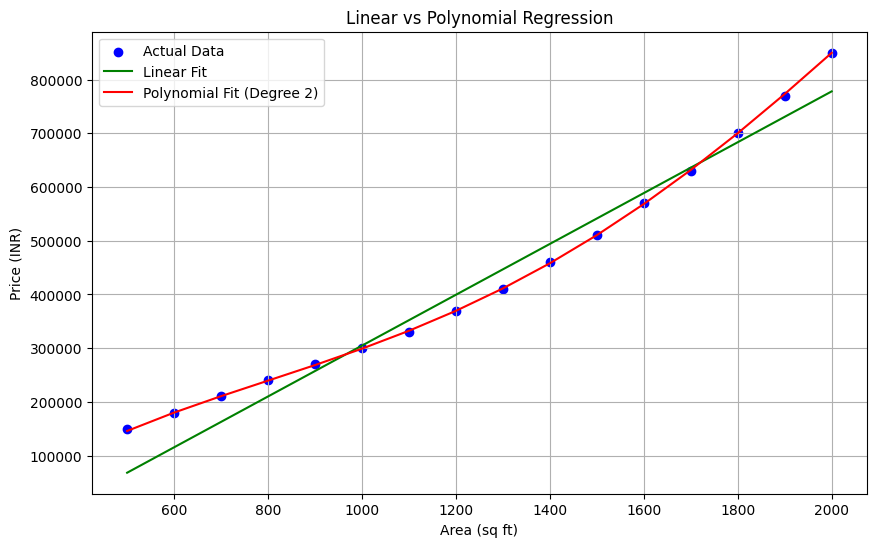

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model_l.predict(X), color='green', label='Linear Fit')
plt.plot(X, poly_l.predict(poly.transform(X)), color='red', label='Polynomial Fit (Degree 2)')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

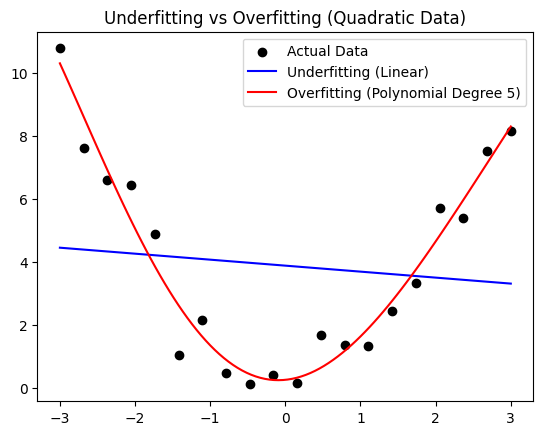

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Generate quadratic data with some noise
np.random.seed(0)
X = np.linspace(-3, 3, 20).reshape(-1, 1)
y = X**2 + np.random.normal(0, 1, X.shape) # Quadratic function with noise
# Train two models: Linear (Underfitting) and Polynomial (Overfitting)
linear_model = LinearRegression()
poly_features = PolynomialFeatures(degree=5) # Higher-degree polynomial (Overfitting)
poly_model = LinearRegression()
# Fit the models
linear_model.fit(X, y)
X_poly = poly_features.fit_transform(X)
poly_model.fit(X_poly, y)
# Predictions
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_linear_pred = linear_model.predict(X_test)
y_poly_pred = poly_model.predict(poly_features.transform(X_test))
# Plot results
plt.scatter(X, y, color="black", label="Actual Data")
plt.plot(X_test, y_linear_pred, label="Underfitting (Linear)", color="blue")
plt.plot(X_test, y_poly_pred, label="Overfitting (Polynomial Degree 5)", color="red")
plt.legend()
plt.title("Underfitting vs Overfitting (Quadratic Data)")
plt.show()